In [1]:
import numpy as np
import pandas as pd
from os.path import join
import pymc3 as pm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from bayescorr import runBayesCorr

In [4]:
# load trial and dwell data
trials = pd.read_csv(join('..', 'results', 'clean_data', 'trials_with-dwells.csv'))
trials.head()

,subject,block,trial,effect,target,key,choice,choice_tcd,rt,pA,...,dwell_Ap,dwell_Am,dwell_Bp,dwell_Bm,dwell_Cp,dwell_Cm,dwell_total,dwell_target,dwell_competitor,dwell_decoy
0,0,1,1,attraction,A,M,A,target,7220.0,0.78,...,0.314554,0.251566,0.150857,0.039272,0.152557,0.091194,5296.395,0.566120,0.190129,0.243751
1,0,1,2,attraction,B,M,B,target,7770.0,0.78,...,0.071439,0.224211,0.155245,0.329696,0.163684,0.055725,6873.000,0.484941,0.295650,0.219409
2,0,1,3,attraction,A,M,C,decoy,5870.0,0.72,...,0.128630,0.165096,0.233418,0.130233,0.273690,0.068932,4991.041,0.293726,0.363652,0.342622
3,0,1,4,attraction,B,L,C,decoy,9550.0,0.78,...,0.095684,0.093789,0.151934,0.238737,0.221803,0.198053,8444.449,0.390671,0.189474,0.419856
4,0,1,5,filler,NaN,M,C,NaN,3740.0,0.29,...,0.000000,0.322605,0.000000,0.111408,0.327980,0.238007,3357.045,NaN,NaN,NaN


In [5]:
# compute subject wise mean relative dwells to probability attribute
dwell_p = trials.groupby('subject')['dwell_p'].mean()
dwell_p.head()

subject
0    0.493446
1    0.534953
2    0.464876
3    0.519860
4    0.501766
Name: dwell_p, dtype: float64

# dwell_p vs MDFT attribute weight

In [6]:
# load MDFT attention weights
estimates = pd.read_csv(join('..', 'results', 'behavioural_modeling', 'estimates', 'estimates_de5.csv'),
                        index_col=0)
estimates.head()

,alpha,alpha_m,alpha_p,beta,bic,delta,gamma,lam,model,nll,...,phi1,phi2,sig2,subject,theta,theta_alt,theta_att,w,w_m,wd
0,0.843802,NaN,NaN,0.591219,460.485547,NaN,NaN,NaN,eu,224.826673,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.402222,NaN,NaN,5.220332,333.809290,NaN,NaN,NaN,eu,161.488545,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,0.139837,NaN,NaN,10.000000,317.647070,NaN,NaN,NaN,eu,153.407435,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
3,0.400089,NaN,NaN,4.324361,409.935739,NaN,NaN,NaN,eu,199.551769,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.393588,NaN,NaN,3.026508,437.083346,NaN,NaN,NaN,eu,213.125573,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mdft_w = estimates.loc[estimates['model'] == 'mdft', 'w']
mdft_w.head()

0    0.448683
1    0.513351
2    0.803316
3    0.542090
4    0.631897
Name: w, dtype: float64

In [8]:
# correlation
trace_1 = runBayesCorr(dwell_p, mdft_w)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional i

In [9]:
pm.summary(trace_1)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu__0,0.497025,0.003792,0.000093,0.489353,0.504286,1727.330565,0.999665
mu__1,0.609223,0.027883,0.000587,0.555585,0.664920,1974.382549,1.000077
r,-0.176171,0.158457,0.004107,-0.490536,0.123887,1264.610779,1.004523
lambda1,1737.771325,405.215115,10.065903,995.995733,2540.267670,1779.833074,1.001204
lambda2,33.080900,7.622308,0.197421,19.330118,48.860845,1714.635402,1.000496
sigma1,0.024490,0.002930,0.000073,0.019109,0.030162,1757.646382,1.001100
sigma2,0.177420,0.021034,0.000565,0.138371,0.217796,1557.553752,1.001351
cov__0_0,0.000608,0.000149,0.000004,0.000349,0.000889,1734.101204,1.001057
cov__0_1,-0.000787,0.000776,0.000022,-0.002477,0.000649,1048.753545,1.005805
cov__1_0,-0.000787,0.000776,0.000022,-0.002477,0.000649,1048.753545,1.005805


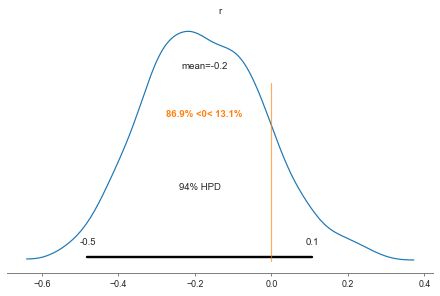

In [10]:
pm.plot_posterior(trace_1, var_names='r', ref_val=0);

There is no correlation between between subjects mean distribution of gaze towards attributes and the attention weight parameter in MDFT. This is not too surprising, as the attention weight parameter in MDFT also acts as a general attribute weight which does not have to be reflected in subjects' allocation of gaze. However, I think that the term *attention* for this parameter is a poor choice of words and must be clearly distinguished from visual attention, as gaze-dependent processing is a feature more and more cognitive models assume and implement.

# dwell_p vs AAM Attribute Accessibilities

For this analysis to be meaningful, the two attribtues (probability and payout) must be transformed to use the same scale. How should this be done? We will 

1. z-transform (subtract mean value, divide by sd, across all options across all trials for this subject).
2. exponentiate z-transformed values so that they're all positive

In [116]:
df = trials[['subject', 'trial', 'pA', 'pB', 'pC', 'mA', 'mB', 'mC']].copy()

In [117]:
p_mean = (df
          .melt(id_vars=['subject', 'trial'], value_vars=['pA', 'pB', 'pC'], var_name='option')
          .groupby('subject')['value']
          .mean()
          .rename('p_mean'))

m_mean = (df
          .melt(id_vars=['subject', 'trial'], value_vars=['mA', 'mB', 'mC'], var_name='option')
          .groupby('subject')['value']
          .mean()
          .rename('m_mean'))


p_std = (df
          .melt(id_vars=['subject', 'trial'], value_vars=['pA', 'pB', 'pC'], var_name='option')
          .groupby('subject')['value']
          .std()
          .rename('p_std'))

m_std = (df
          .melt(id_vars=['subject', 'trial'], value_vars=['mA', 'mB', 'mC'], var_name='option')
          .groupby('subject')['value']
          .std()
          .rename('m_std'))

In [118]:
df = (df
      .merge(p_mean, on='subject')
      .merge(m_mean, on='subject')
      .merge(p_std, on='subject')
      .merge(m_std, on='subject'))

In [130]:
def calcAttAcc(x, a0=0, salience=np.ones(3)):
    M = x[['pA', 'pB', 'pC', 'mA', 'mB', 'mC']].values.reshape(2, 3).T
    # z transform
    M[:, 0] = (M[:, 0] - x['p_mean']) / x['p_std']
    M[:, 1] = (M[:, 1] - x['m_mean']) / x['m_std']
    M = np.exp(M)
    A = a0 + np.dot(salience, M)
    W = A / A.sum()
    return W

In [131]:
df['aam_a'] = df.apply(lambda x: calcAttAcc(x, a0=0, salience=np.ones(3))[0],
                       axis=1)
df.head()

,subject,trial,pA,pB,pC,mA,mB,mC,p_mean,m_mean,p_std,m_std,aam_a
0,0,1,0.78,0.62,0.76,11,15,10,0.670311,14.013333,0.13122,7.540285,0.674538
1,0,2,0.78,0.65,0.63,11,15,14,0.670311,14.013333,0.13122,7.540285,0.581282
2,0,3,0.72,0.62,0.70,12,15,11,0.670311,14.013333,0.13122,7.540285,0.568634
3,0,4,0.78,0.62,0.60,11,15,14,0.670311,14.013333,0.13122,7.540285,0.559935
4,0,5,0.29,0.42,0.72,34,23,13,0.670311,14.013333,0.13122,7.540285,0.083218


In [132]:
aam_a = df.groupby('subject')['aam_a'].mean()

In [133]:
trace_2 = runBayesCorr(dwell_p, aam_a)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda2, lambda1, mu, r]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:26<00:00, 147.71draws/s]


In [134]:
pm.summary(trace_2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu__0,0.496928,0.003908,0.000079,0.490173,0.505211,2051.194379,1.000919
mu__1,0.524787,0.002431,0.000051,0.519580,0.529152,2065.548674,0.999612
r,0.208085,0.169837,0.004378,-0.141749,0.512333,1509.530633,1.000523
lambda1,1705.018279,396.341817,9.262606,975.335466,2455.607269,1622.007001,0.999543
lambda2,4277.597925,972.337048,22.440740,2515.484890,6163.461267,1852.015825,1.000876
sigma1,0.024718,0.002935,0.000072,0.019097,0.030262,1616.942952,0.999388
sigma2,0.015595,0.001828,0.000046,0.012542,0.019555,1753.928369,1.001030
cov__0_0,0.000620,0.000150,0.000004,0.000365,0.000916,1581.357019,0.999434
cov__0_1,0.000083,0.000074,0.000002,-0.000060,0.000230,1149.088575,1.001019
cov__1_0,0.000083,0.000074,0.000002,-0.000060,0.000230,1149.088575,1.001019


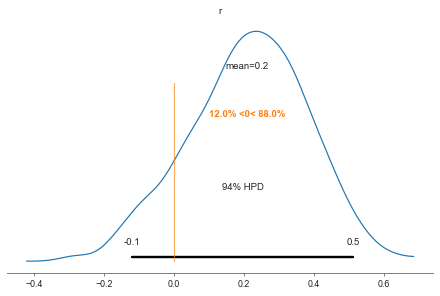

In [135]:
pm.plot_posterior(trace_2, var_names='r', ref_val=0);

The correlation between AAM attribute accessibilities and subjects dwells toward an attribute is not meaningful.